In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import os,glob
import pandas as pd
path = '/Users/zoe/Desktop/training/*.psv'
header = 'HR|O2Sat|Temp|SBP|MAP|DBP|Resp|EtCO2|BaseExcess|HCO3|FiO2|pH|PaCO2|SaO2|AST|BUN|Alkalinephos|Calcium|Chloride|Creatinine|Bilirubin_direct|Glucose|Lactate|Magnesium|Phosphate|Potassium|Bilirubin_total|TroponinI|Hct|Hgb|PTT|WBC|Fibrinogen|Platelets|Age|Gender|Unit1|Unit2|HospAdmTime|ICULOS|SepsisLabel'
def readData(filename):
    datas = []
    with open(filename) as fr:
        fr.readline()
        for line in fr:
            datas.append(line.strip())
    return datas

In [30]:
labels = {}
import random
fw = open('undersampling.csv', 'w')
fw.write(header+'\n')
for filename in glob.glob(path):
    dat = readData(filename)
    for d in dat:
        labels.setdefault(d[-1], []).append(d)
for k, v in labels.items():
    v = random.sample(v,len(v))
    print(k, len(v))
    for vv in v:  
        fw.write(vv.strip()+'\n')
        fw.flush()

0 1524294
1 27916


In [31]:
import pandas as pd
df = pd.read_csv('undersampling.csv', sep='|')

In [32]:
df.shape

(1552210, 41)

In [33]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [34]:
df = pd.concat([df[df['SepsisLabel']==0].sample(len(df[df['SepsisLabel']==1])* 10),df[df['SepsisLabel']==1]])
print(df.SepsisLabel.value_counts())

0    279160
1     27916
Name: SepsisLabel, dtype: int64


In [35]:
df.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
471881,68.0,100.0,NaN,112.0,75.0,52.0,20.0,NaN,0.0,22.0,...,10.3,NaN,167.0,21.47,0,NaN,NaN,-0.02,35,0
1315139,92.0,99.0,NaN,146.0,88.0,62.0,13.0,NaN,2.0,NaN,...,NaN,NaN,NaN,78.26,1,NaN,NaN,-60.50,32,0
496884,64.0,100.0,36.0,102.0,68.0,47.0,15.5,16.0,NaN,NaN,...,NaN,NaN,NaN,79.00,0,0.0,1.0,-20.22,15,0
1435554,64.0,95.0,NaN,157.0,96.0,68.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69.00,0,NaN,NaN,-15.21,11,0
362713,78.5,100.0,37.4,101.0,78.5,96.0,10.0,34.5,NaN,NaN,...,NaN,NaN,NaN,67.00,1,0.0,1.0,-5366.86,75,0


In [36]:
df.isnull().sum().sum()#check null

8590181

In [37]:
(df.isnull().sum()/df.shape[0]).sort_values()

SepsisLabel         0.000000
Gender              0.000000
Age                 0.000000
ICULOS              0.000000
HospAdmTime         0.000007
HR                  0.097383
MAP                 0.121950
O2Sat               0.128437
SBP                 0.145970
Resp                0.152594
DBP                 0.313320
Unit2               0.399370
Unit1               0.399370
Temp                0.662527
Glucose             0.828912
Potassium           0.903425
Hct                 0.909055
FiO2                0.909332
Hgb                 0.924211
pH                  0.925468
BUN                 0.929483
WBC                 0.934127
Magnesium           0.935071
Creatinine          0.937810
Calcium             0.939015
Platelets           0.939126
PaCO2               0.939793
BaseExcess          0.941698
Chloride            0.952442
HCO3                0.956200
Phosphate           0.958111
EtCO2               0.958150
SaO2                0.962853
PTT                 0.969265
Lactate       

In [38]:
find_small_HR_list = df['HR'].to_list()
count = 0
for i in find_small_HR_list:
    if(i<30):
        count+=1
print(count)
df.loc[df['HR']<30,'HR']=60

find_small_Temp_list = df['Temp'].to_list()
count = 0
for i in find_small_Temp_list:
    if(i>=43):
        count+=1
print(count)
df.loc[df['Temp']>43,'Temp']=42

find_small_Resp_list = df['Resp'].to_list()
count = 0
for i in find_small_Resp_list:
    if(i>=78):
        count+=1
print(count)
df.loc[df['Resp']>=78,'Resp']=78

find_large_Resp_list = df['Resp'].to_list()
count = 0
for i in find_large_Resp_list:
    if(i<=8):
        count+=1
print(count)
df.loc[df['Resp']<=8,'Resp']=8

16
0
14
1916


In [39]:
title = header.strip().split('|')[:-1]
title.remove('BaseExcess')
title.remove('HCO3')
#title.remove('EtCO2')
title.remove('FiO2')
title.remove('PaCO2')
title.remove('SaO2')
title.remove('AST')
title.remove('BUN')
title.remove('Alkalinephos')
title.remove('Calcium')
title.remove('Chloride')
title.remove('Creatinine')
title.remove('Bilirubin_direct')
title.remove('Glucose')
title.remove('Lactate')
title.remove('Magnesium')
title.remove('Phosphate')
title.remove('Potassium')
title.remove('Bilirubin_total')
title.remove('TroponinI')
title.remove('Hct')
title.remove('Hgb')
title.remove('PTT')
title.remove('WBC')
title.remove('Fibrinogen')
title.remove('Platelets')
title.remove('Unit1')
title.remove('Unit2')
title.remove('pH')
del df['BaseExcess']
del df['HCO3']
#del df['EtCO2']
del df['FiO2']
del df['PaCO2']
del df['SaO2']
del df['AST']
del df['BUN']
del df['Alkalinephos']
del df['Calcium']
del df['Chloride']
del df['Creatinine']
del df['Bilirubin_direct']
del df['Glucose']
del df['Lactate']
del df['Magnesium']
del df['Phosphate']
del df['Potassium']
del df['Bilirubin_total']
del df['TroponinI']
del df['Hct']
del df['Hgb']
del df['PTT']
del df['WBC']
del df['Fibrinogen']
del df['Platelets']
del df['Unit1']
del df['Unit2']
del df['pH']

In [40]:
title

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'Age',
 'Gender',
 'HospAdmTime',
 'ICULOS']

### filling with upper and lower mean

In [41]:
import numpy as np
def time_interval(x,interval=10):
    return str(x - x%interval)+'——'+str(x - x%interval+interval)
###Segmentation of ICULOS with segments of length 10, i.e. 0-10, 10-20, 20-30...
df['interval'] = df['ICULOS'].apply(lambda x:time_interval(x))
train_data = df.copy()
#Filling in missing variables
for new_label in title:
    #Forward fill first
    train_data[new_label] = train_data[new_label].fillna(method='pad')
    if train_data[new_label].isnull().sum() == 0:#Non-missing variables are skipped directly
        pass
    else:
        new_train_x = train_data[train_data[new_label].isnull()==False]
        g = new_train_x.groupby(['interval'])[new_label].mean()#Obtain the mean value of the non-missing part of the missing variable under each ICULOS segment值
        intervals = train_data.loc[train_data[new_label].isnull()==True,'interval'].unique()
        for it in intervals:#The missing distributions are filled separately according to ICULOS
            if it in g.index:
                train_data.loc[(train_data[new_label].isnull()==True)&(train_data['interval']==it),new_label] = g[it]
        #For missing variables where there is no corresponding fill value for the missing part, the average value of all non-missing parts is used to fill the variable
        train_data[new_label] = train_data[new_label].fillna(np.nanmean(train_data[new_label]))
del df['interval']
del train_data['interval']

In [42]:
train_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
471881,68.0,100.0,37.000625,112.0,75.0,52.0,20.0,33.013704,21.47,0,-0.02,35,0
1315139,92.0,99.0,37.000625,146.0,88.0,62.0,13.0,33.013704,78.26,1,-60.50,32,0
496884,64.0,100.0,36.000000,102.0,68.0,47.0,15.5,16.000000,79.00,0,-20.22,15,0
1435554,64.0,95.0,36.000000,157.0,96.0,68.0,23.0,16.000000,69.00,0,-15.21,11,0
362713,78.5,100.0,37.400000,101.0,78.5,96.0,10.0,34.500000,67.00,1,-5366.86,75,0


In [43]:
train_data.isnull().sum().sort_values(ascending=False)

SepsisLabel    0
ICULOS         0
HospAdmTime    0
Gender         0
Age            0
EtCO2          0
Resp           0
DBP            0
MAP            0
SBP            0
Temp           0
O2Sat          0
HR             0
dtype: int64

In [44]:
train_data_x = train_data.loc[:,train_data.columns!='SepsisLabel']
train_data_y = train_data['SepsisLabel']

In [45]:
set(train_data_y.tolist())

{0, 1}

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_x,train_data_y,test_size=0.3, random_state=2021)

In [47]:
len(X_train)

214953

In [48]:
import os
import numpy as np
import pandas as pd
import catboost as cat
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn import svm

from sklearn.metrics import classification_report, accuracy_score,auc,confusion_matrix,precision_score,recall_score,roc_auc_score,\
roc_curve,f1_score,plot_confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set()
print(os.listdir()) #chinese edition to save picture

['undersampling-1比1-平均.ipynb', '非将采样AdaBoost分类的ROC曲线.png', '平均非将采样Random Forest分类的ROC曲线.png', '1比1采样SVM分类的ROC曲线.png', '平均1比1xgBoost分类的ROC曲线.png', '平均AdaBoost分类的ROC曲线.png', 'Random ForestROCcurve.png', '1比1采样AdaBoost分类的ROC曲线.png', '平均1比1CatBoost分类的ROC曲线.png', 'undersampling-1比1.ipynb', 'Logistic分类的ROC曲线.png', 'GBDT分类的ROC曲线.png', '非将采样LightGBM分类的ROC曲线.png', '.DS_Store', '平均非将采样CatBoost分类的ROC曲线.png', 'undersampling.csv', '建模结果.csv', '1比1采样LightGBM分类的ROC曲线.png', '1比1采样Random Forest分类的ROC曲线.png', '1比1采样KNN分类的ROC曲线.png', '平均LightGBM分类的ROC曲线.png', 'alldata.csv', 'Rnandom Forest分类的ROC曲线.png', '平均1比1KNN分类的ROC曲线.png', '非将采样建模结果.csv', '1比1采样Logistic分类的ROC曲线.png', '非将采样SVM分类的ROC曲线.png', '平均Logistic分类的ROC曲线.png', 'SVM分类的ROC曲线.png', '平均SVM分类的ROC曲线.png', 'LightGBM分类的ROC曲线.png', '1比1采样Decision Tree分类的ROC曲线.png', '非将采样Logistic分类的ROC曲线.png', '平均非将采样KNN分类的ROC曲线.png', '1比1采样GBDT分类的ROC曲线.png', 'KNN分类的ROC曲线.png', '平均KNN分类的ROC曲线.png', 'noundersampling.ipynb', '平均非将采样Decision Tree分类的ROC曲线.png', '平均非将采样xgBoost

In [49]:
gbdt = GradientBoostingClassifier(n_estimators=40)
rf = RandomForestClassifier(n_estimators=500,max_depth=10)
knn = KNeighborsClassifier(n_neighbors=3)
byes = MultinomialNB(alpha=0.001)
logr = LogisticRegression(penalty='l2')
dt = tree.DecisionTreeClassifier(max_depth=9)
lg = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_leaves=46,min_data_in_leaf=11,learning_rate=0.18,metric='auc',
                              feature_fraction=0.9)
ct = cat.CatBoostClassifier(iterations=30,depth=9,learning_rate=0.08,loss_function='Logloss', logging_level='Silent')
xg = xgb.XGBClassifier()
ada = AdaBoostClassifier()
#rsvc = svm.SVC(kernel='rbf',max_iter=100,probability=True)

****************************************************************************************************


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


confusion matrix: 
 predict      0     1
true                
0        81357  2418
1         5181  3167


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


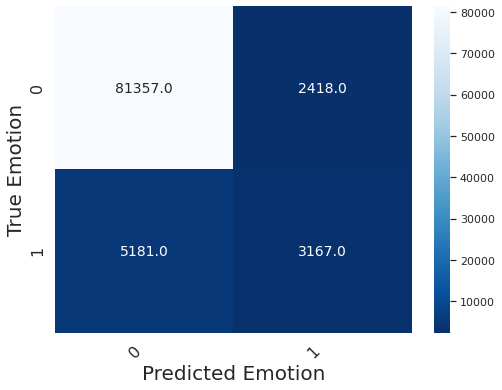

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     86538
           1       0.38      0.57      0.45      5585

    accuracy                           0.92     92123
   macro avg       0.68      0.75      0.70     92123
weighted avg       0.94      0.92      0.93     92123

KNNresult:

Precision_score: 0.5670546105640107
Recall_score: 0.3793723047436512
f1_score: 0.4546041771334243
AUC: 0.7679533803853472


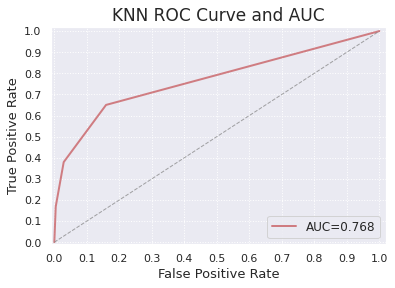

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0    1
true               
0        83222  553
1         7840  508


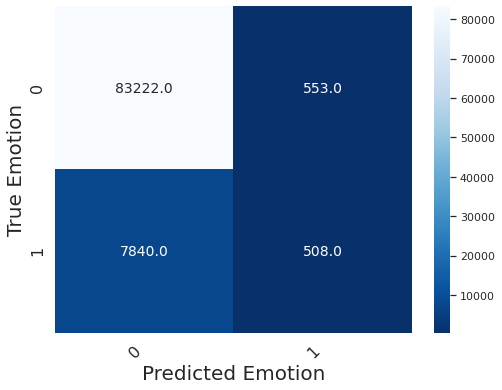

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     91062
           1       0.06      0.48      0.11      1061

    accuracy                           0.91     92123
   macro avg       0.53      0.70      0.53     92123
weighted avg       0.98      0.91      0.94     92123

Logisticresult:

Precision_score: 0.47879359095193214
Recall_score: 0.06085289889793963
f1_score: 0.10798171963014136
AUC: 0.7122502147339751


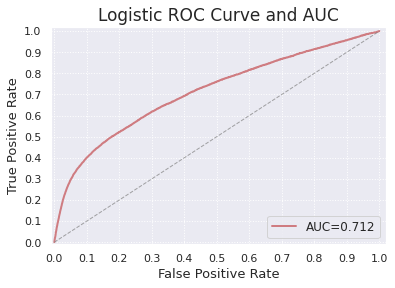

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        82810   965
1         7142  1206


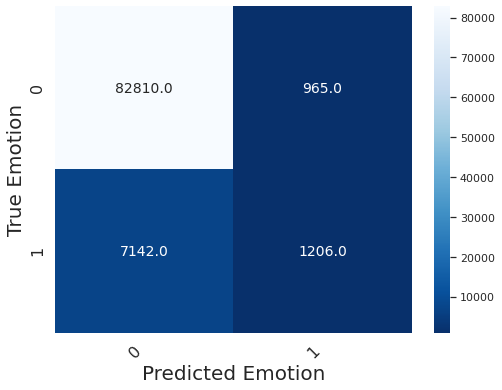

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     89952
           1       0.14      0.56      0.23      2171

    accuracy                           0.91     92123
   macro avg       0.57      0.74      0.59     92123
weighted avg       0.97      0.91      0.94     92123

Decision Treeresult:

Precision_score: 0.5555043758636573
Recall_score: 0.14446574029707715
f1_score: 0.22929936305732485
AUC: 0.7700054478870992


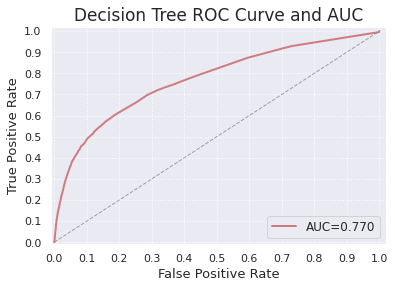

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0    1
true               
0        83255  520
1         7366  982


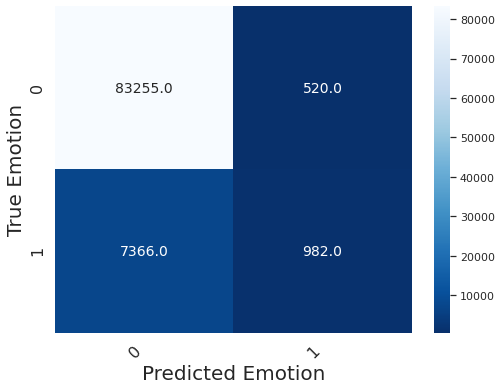

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     90621
           1       0.12      0.65      0.20      1502

    accuracy                           0.91     92123
   macro avg       0.56      0.79      0.58     92123
weighted avg       0.98      0.91      0.94     92123

GBDTresult:

Precision_score: 0.6537949400798935
Recall_score: 0.11763296597987542
f1_score: 0.19939086294416244
AUC: 0.7913914318319901


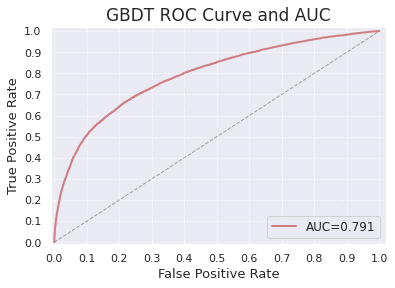

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0    1
true               
0        83432  343
1         7485  863


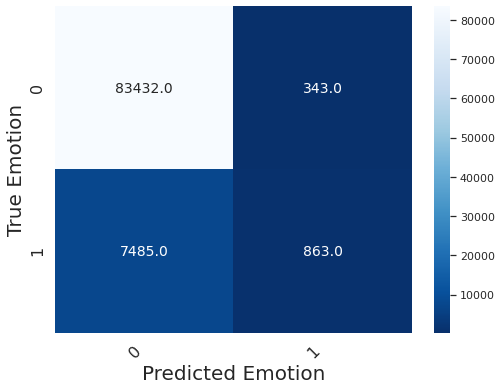

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     90917
           1       0.10      0.72      0.18      1206

    accuracy                           0.92     92123
   macro avg       0.55      0.82      0.57     92123
weighted avg       0.98      0.92      0.95     92123

Random Forestresult:

Precision_score: 0.7155887230514096
Recall_score: 0.103378054623862
f1_score: 0.18065731630730583
AUC: 0.8045270469005884


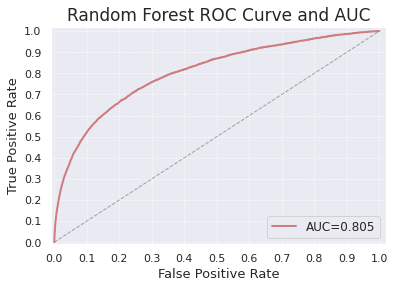

****************************************************************************************************
****************************************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
confusion matrix: 
 predict      0     1
true                
0        82916   859
1         6599  1749


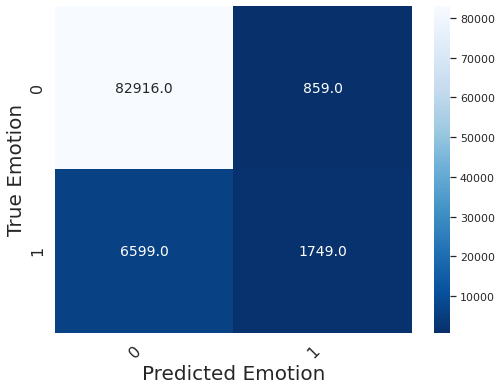

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     89515
           1       0.21      0.67      0.32      2608

    accuracy                           0.92     92123
   macro avg       0.60      0.80      0.64     92123
weighted avg       0.97      0.92      0.94     92123

LightGBMresult:

Precision_score: 0.6706288343558282
Recall_score: 0.20951126018207955
f1_score: 0.3192771084337349
AUC: 0.8565729672982356


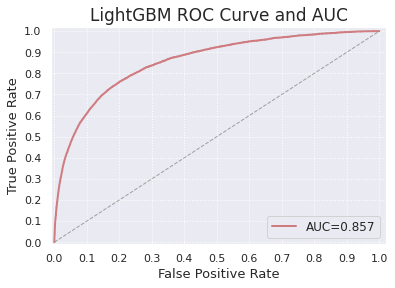

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0    1
true               
0        83368  407
1         7496  852


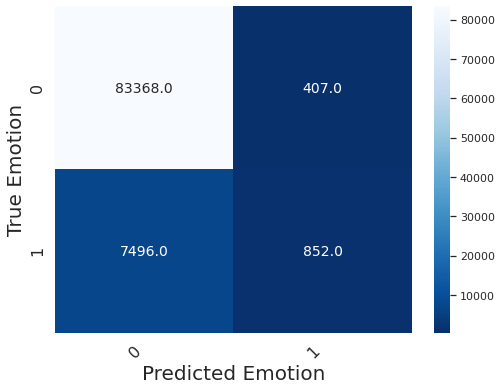

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.95     90864
           1       0.10      0.68      0.18      1259

    accuracy                           0.91     92123
   macro avg       0.55      0.80      0.57     92123
weighted avg       0.98      0.91      0.94     92123

CatBoostresult:

Precision_score: 0.6767275615567911
Recall_score: 0.1020603737422137
f1_score: 0.17737066722181744
AUC: 0.7951640264432719


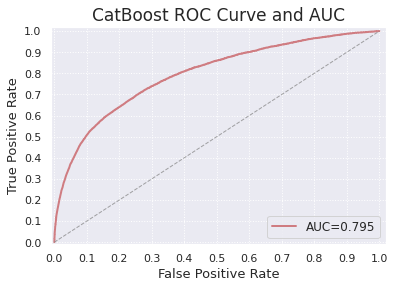

****************************************************************************************************
****************************************************************************************************
[22:47:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix: 
 predict      0     1
true                
0        82848   927
1         6497  1851


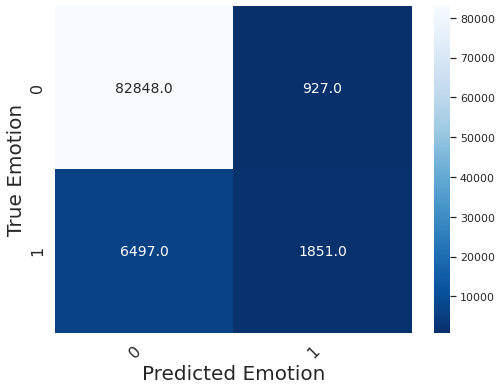

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     89345
           1       0.22      0.67      0.33      2778

    accuracy                           0.92     92123
   macro avg       0.61      0.80      0.64     92123
weighted avg       0.97      0.92      0.94     92123

xgBoostresult:

Precision_score: 0.6663066954643628
Recall_score: 0.22172975563009104
f1_score: 0.3327341362574151
AUC: 0.8554556378267535


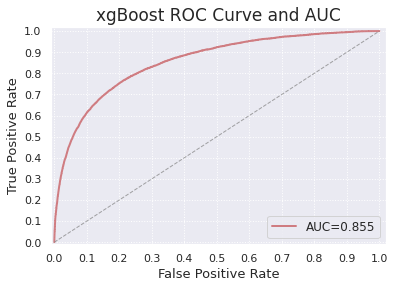

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict      0     1
true                
0        82753  1022
1         6926  1422


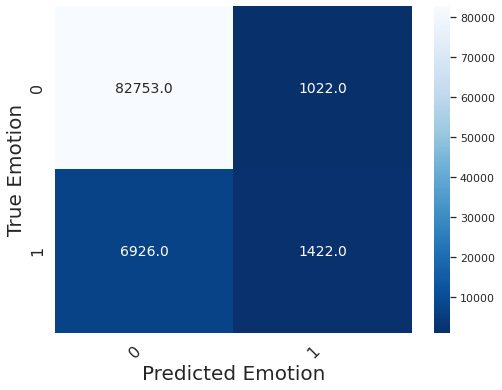

classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     89679
           1       0.17      0.58      0.26      2444

    accuracy                           0.91     92123
   macro avg       0.58      0.75      0.61     92123
weighted avg       0.97      0.91      0.94     92123

AdaBoostresult:

Precision_score: 0.5818330605564648
Recall_score: 0.17034020124580737
f1_score: 0.2635285396590067
AUC: 0.7958250782114973


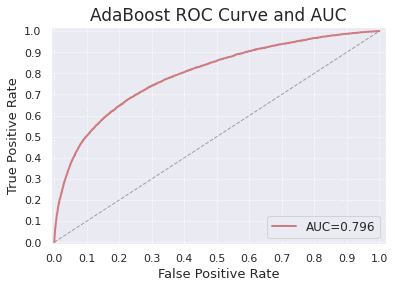

****************************************************************************************************


In [53]:
model = [knn,logr,dt, gbdt, rf,lg,ct,xg,ada]
model2 = ['KNN','Logistic','Decision Tree','GBDT','Random Forest','LightGBM','CatBoost','xgBoost','AdaBoost']
x1 = []
x2 = []
x3 = []
x4 = []
for i,md in enumerate(model):
    print('*'*100)
    md.fit(X_train, y_train)
    y_one_hot = y_test
    y_score = md.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_one_hot,y_score[:,1])
    auc1 = auc(fpr, tpr)
    Y_valid = y_test
    Y_pred = md.predict(X_test)
    precision = precision_score(Y_valid, Y_pred)
    recall = recall_score(Y_valid, Y_pred)
    f1 = f1_score(Y_valid, Y_pred)
    
    predd = pd.DataFrame()
    predd['predict'] = Y_pred
    predd['true'] = list(Y_valid)
    predd['x'] = 0
    gg = predd.groupby(['predict','true'])['x'].count().unstack(0)
    print('confusion matrix: \n', gg)
    f, ax = plt.subplots(figsize=(8,6))
    df_cm = pd.DataFrame(gg)
    sns.heatmap(df_cm,annot=True,fmt ='.1f',cmap = 'Blues_r',annot_kws={'size': 14})
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, rotation=45, horizontalalignment='right',fontsize=16)
    plt.setp(label_y,  fontsize=16)
    plt.xlabel('Predicted Emotion',fontsize=20)
    plt.ylabel('True Emotion',fontsize=20)
    plt.show()
    
    print('classification_report: \n', classification_report(Y_pred, Y_valid,))
    print(model2[i]+'result:\n')
    print("Precision_score:",precision)
    print("Recall_score:",recall)
    print("f1_score:",f1)
    print("AUC:",auc1)
    x1.append(precision)
    x2.append(recall)
    x3.append(auc1)
    x4.append(f1)
    plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc1)
    plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title(model2[i]+' ROC Curve and AUC', fontsize=17)
    plt.savefig('average'+model2[i]+'ROCcurve.png')
    plt.show()
    print('*'*100)
res = pd.DataFrame()
res['classifier'] = model2
res['precision'] = x1
res['recall'] = x2
res['f1_score'] = x4
res['AUC'] = x3

In [54]:
res.to_csv('result.csv',index=False,encoding='utf-8-sig')

In [55]:
res.style.background_gradient('autumn_r')

,classifier,precision,recall,f1_score,AUC
0,KNN,0.567055,0.379372,0.454604,0.767953
1,Logistic,0.478794,0.060853,0.107982,0.712250
2,Decision Tree,0.555504,0.144466,0.229299,0.770005
3,GBDT,0.653795,0.117633,0.199391,0.791391
4,Random Forest,0.715589,0.103378,0.180657,0.804527
5,LightGBM,0.670629,0.209511,0.319277,0.856573
6,CatBoost,0.676728,0.102060,0.177371,0.795164
7,xgBoost,0.666307,0.221730,0.332734,0.855456
8,AdaBoost,0.581833,0.170340,0.263529,0.795825


In [56]:
X_test.shape

(92123, 12)

In [57]:
X_train.shape

(214953, 12)

In [58]:
2037/(5994+2037)

0.2536421367202092

## Parametric Optimization

[19:15:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=2, now auc =0.8131940661785303
[19:15:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=3, now auc =0.8216496023399891
[19:16:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: S

No handles with labels found to put in legend.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


looking for the best max_depth=19, now auc =0.9325136100659794
the best auc is：0.9344515664963237, now max_depth=17


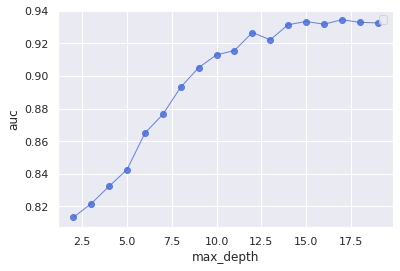

In [34]:
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
aucs = []
n_estimators = []
for n in range(2, 20, 1):
    rfc = xgb.XGBClassifier(max_depth=n)
    rfc.fit(X_train, y_train)
    preprorfc = rfc.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preprorfc)
    n_estimators.append(n)
    aucs.append(auc(fpr, tpr))
    print('looking for the best max_depth={}, now auc ={}'.format(n, auc(fpr, tpr)))
print('the best auc is：{}, now max_depth={}'.format(max(np.array(aucs)), n_estimators[np.argmax(aucs)]))
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

x_axis_data = n_estimators
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)

plt.legend(loc="upper right")
plt.xlabel('max_depth')
plt.ylabel('auc')
plt.show()

## pca

[20:03:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best n_component=5, now auc =0.7956
[20:04:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best n_component=6, now auc =0.7977
[20:04:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1

No handles with labels found to put in legend.


looking for the best n_component=11, now auc =0.8217
the best auc：0.821732435961946, now n_estimators=11


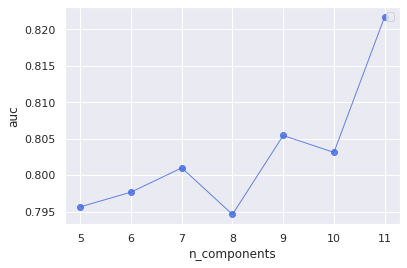

In [35]:
from sklearn.decomposition import PCA
aucs = []
n_components = []
for n_component in range(5, 12):
    pca = PCA(n_components = n_component)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    rfc = xgb.XGBClassifier()
    rfc.fit(X_train_pca, y_train.tolist())
    preprorfc = rfc.predict_proba(X_test_pca)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preprorfc)
    n_components.append(n_component)
    aucs.append(auc(fpr, tpr))
    print('looking for the best n_component={}, now auc ={}'.format(n_component, round(auc(fpr, tpr), 4)))
print('the best auc：{}, now n_estimators={}'.format(max(np.array(aucs)), n_components[np.argmax(aucs)]))
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

x_axis_data = n_components
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)

plt.legend(loc="upper right")
plt.xlabel('n_components')
plt.ylabel('auc')
plt.show()

## k-ford

In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
from sklearn import preprocessing
X_train_sc = preprocessing.scale(X_train)
info = {}
for i in y_train:
    info[i] = info.setdefault(i, 0) + 1
print(info)

{0: 195385, 1: 19568}


In [60]:
ks = []
aucs = []
for index, (train_index, test_index) in enumerate(kf.split(X_train_sc)):
    train_X_k, train_y_k = np.array(X_train_sc)[train_index], np.array(y_train)[train_index]
    test_X_k, test_y_k = np.array(X_train_sc)[test_index], np.array(y_train)[test_index]
    rfc = xgb.XGBClassifier()
    rfc.fit(train_X_k, train_y_k)
    preprorfc = rfc.predict_proba(test_X_k)[:,1]
    fpr, tpr, thresholds = roc_curve(test_y_k, preprorfc)
    print('the{}，auc:{}'.format(index, auc(fpr, tpr)))
    ks.append(index)
    aucs.append(auc(fpr, tpr))

[22:50:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the0，auc:0.8506354205020743
[22:50:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the1，auc:0.8585189399336279
[22:50:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with th

No handles with labels found to put in legend.


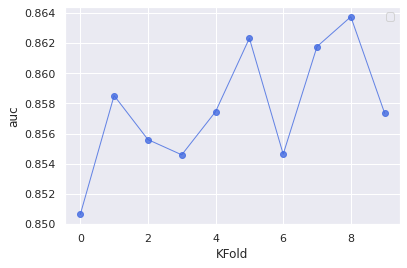

In [61]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  
x_axis_data = ks
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.legend(loc="upper right")
plt.xlabel('KFold')
plt.ylabel('auc')
plt.show()